# Approfondissement sur les distributions 1D - Solution

In [1]:
import openturns as ot
import numpy as np

## Exercise 1 : product

We want to compute the distribution of the product of a uniform distribution and a gaussian distribution.
- Define the variable `U` with Uniform distribution with bounds a = 0, b = 1.
- Define the variable `N` with Normal distribution with parameters 0 and 1.
- Define the variable `Z = U * N` using the arithmetic operator `*`.
- Plot the PDF of `Z`.

## Solution de l'exercice 1 : product

There is a singularity in zero. However, if the PDF is not evaluated at the singularity, the PDF is fine. This is why we set the number of points to a even number. 

Reference:

https://openturns.discourse.group/t/is-algebra-of-random-variables-commutative/72/2


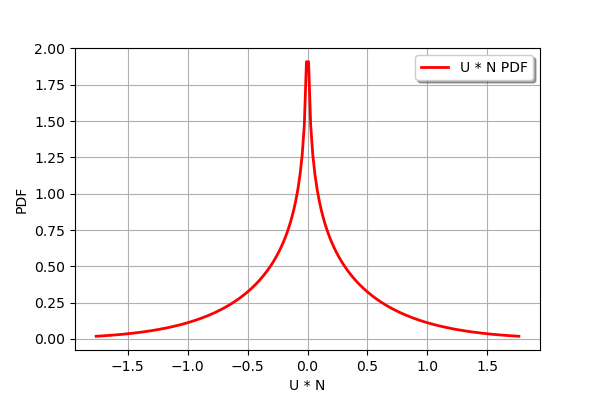

In [2]:
u = ot.Uniform(0.0, 1.0)
n = ot.Normal(0.0, 1.0)
z = u * n
z.setDescription(["U * N"])  # Optionnal
z.drawPDF(200)  # Singularity

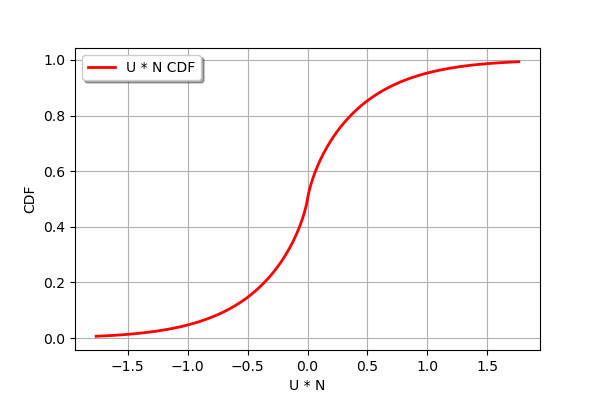

In [3]:
z.drawCDF(200)

## Exercice 2 : axial stressed beam



## Solution de l'exercice 2 : axial stressed beam

Create the variable F Normal distribution 1D.

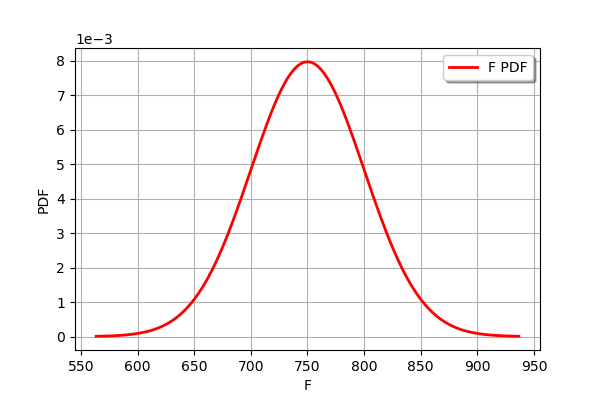

In [4]:
F = ot.Normal(750.0, 50.0)
F.setName("Traction_load")
F.setDescription("F")

F.drawPDF()

Create the variable R : LogNormal distribution 1D, parameterized by its mean and standard deviation. 

In [5]:
parameters = ot.LogNormalMuSigma(3.0e6, 3.0e5, 0.0)
R = parameters.getDistribution()
R.setName("Yield strength")
R.setDescription("R")
R

class=LogNormal name=Yield strength dimension=1 muLog=14.9091 sigmaLog=0.0997513 gamma=0

In [6]:
R.getStandardDeviation()

class=Point name=Unnamed dimension=1 values=[300000]

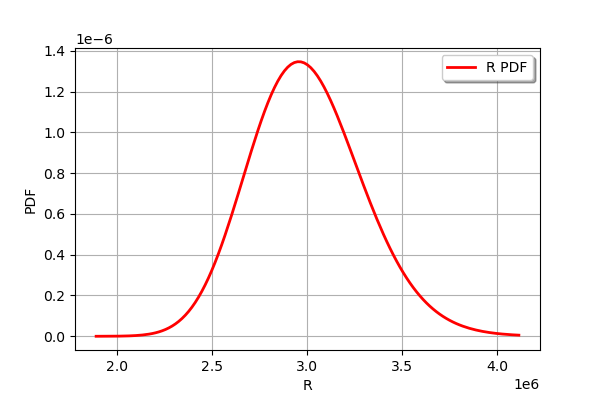

In [7]:
R.drawPDF()

Define D.

In [8]:
D = 0.02

Define the random variable Y = G(X) using the arithmetic operator `-`

In [9]:
Y = R - F / (np.pi * D ** 2 / 4)

Finally, compute the probability.

In [10]:
pf = Y.computeCDF(0.0)
pf

0.029198194624830504

## Exercice 3 : une autre distribution uniforme

L'objectif de cet exercice est d'utiliser la classe `PythonDistribution` pour créer la nouvelle distribution `UDistribution` implémentant la loi uniforme.

La fonction de répartition de la loi uniforme est:

$$
P(X\leq x) = 
\left\{
\begin{array}{l}
0 \textrm{ si } x\leq a, \\
\frac{x-a}{b-a} \textrm{ si } x\leq b, \\
1 \textrm{ sinon}.
\end{array}
\right.
$$

- Créer la classe `UDistribution` dérivant de la classe `PythonDistribution`.
- Créer le constructeur de la classe, c'est à dire la méthode `__init__`.
- Créer la méthode `computeCDF` qui calcule la fonction de répartition.

Pour vous aider, nous vous fournissons un squelette de solution, dans lequel vous compléterez les sections de code `TODO`.
```python
class UDistribution(ot.PythonDistribution):
    def __init__(self, a, b):
        super(UDistribution, self).__init__(TODO)
        TODO
    def computeCDF(self, x):
        u = x[0]
        if TODO:
            p = TODO
        elif TODO:
            p = TODO
        else:
            p = TODO
        return p
```

## Solution de l'exercice 3 : une autre distribution uniforme

In the following example, we define the `U` distribution, another implementation of the uniform distribution. This time, we only define the `computeCDF` method.

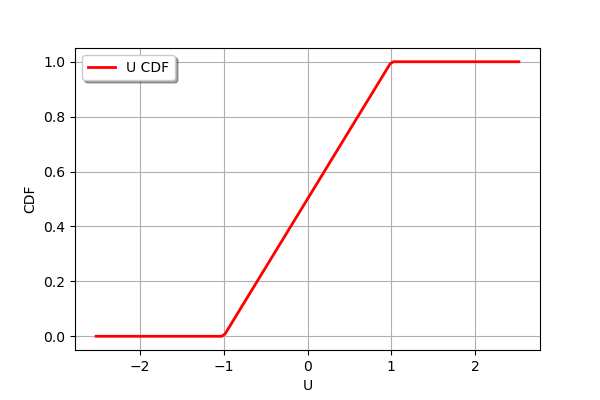

In [11]:
class UDistribution(ot.PythonDistribution):
    def __init__(self, a, b):
        super(UDistribution, self).__init__(1)
        self.a = a
        self.b = b

    def computeCDF(self, x):
        u = x[0]
        if u <= self.a:
            p = 0.0
        elif u < self.b:
            p = (u - self.a) / (self.b - self.a)
        else:
            p = 1.0
        return p

U = ot.Distribution(UDistribution(-1.0, 1.0))
U.setDescription(["U"])

U.drawCDF()

The `drawPDF` plots the PDF. This requires the derivative, which is approximated based on finite differences of the CDF.

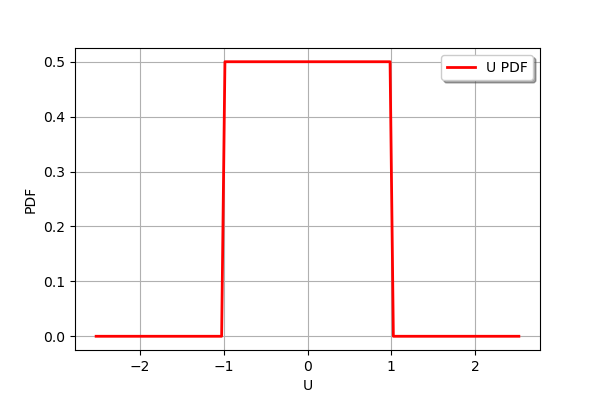

In [12]:
U.drawPDF()

## Exercice 4 : un débit positif

On considère la variable Q associée au débit d'une rivière ($m^3/s$). On fait l'hypothèse qu'il s'agit du débit maximal annuel. C'est pourquoi nous choisissons de modéliser cette variable par la loi de Gumbel de paramètres suivants :

- échelle=500, 
- mode=900.

De plus, le débit est une variable positive de telle sorte que la distribution doit être tronquée avec une borne inférieure.

L'objectif de cet exercice est de définir la variable aléatoire `Q` associée à cette distribution.

- Utiliser la classe `Gumbel` pour définir les paramètres de la loi de Gumbel associée. 
- Utiliser la classe `ParametrizedDistribution` pour créer la variable `Quntruncated` associée à la variable non tronquée.
- Dessiner la PDF de `Quntruncated`.
- Utiliser la classe `TruncatedDistribution` pour créer la variable `Q` associée à la loi de Gumbel tronquée. 
- Dessiner la PDF de `Q` : que remarquez-vous ?

## Solution de l'exercice 4 : un débit positif

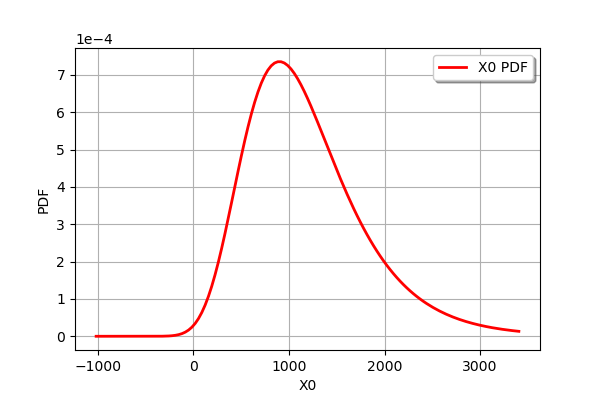

In [13]:
Quntruncated = ot.Gumbel(500.0, 900.0)

Quntruncated.drawPDF()

In [14]:
Q = ot.TruncatedDistribution(Quntruncated, 0.0, ot.TruncatedDistribution.LOWER)

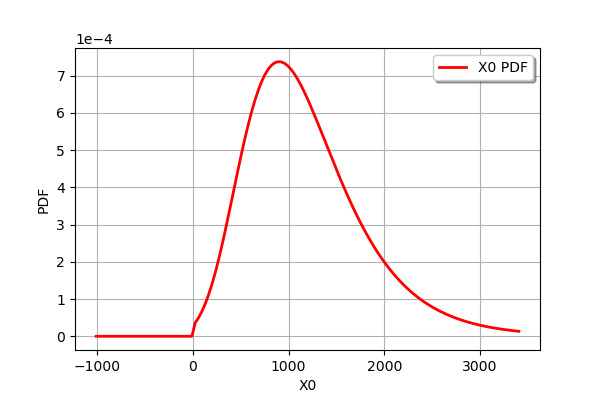

In [15]:
Q.drawPDF()

On remarque une discontinuité en $Q=0$ due à la troncature. 